## Monte Carlo Simulation for Value at Risk (VaR) and Conditional Value at Risk (CVaR)

### Thomas Polstra, PhD

##### [GitHub](https://github.com/thomaspolstra/Quant_Materials_Polstra_Public.git) -- [Academic Website](https://thomaspolstra.github.io/) -- [Email](mailto:thomaspolstra@gmail.com)

#### VaR: Predicting the Worst-case Loss

**Value at Risk (VaR)** is a risk measurement that quantifies the potential loss in value of a portfolio or investment within a specified time horizon and at a certain confidence level. It answers the question: "What is the maximum loss that my investment may incur with a given probability?" To calculate VaR using Monte Carlo simulation, we generate a large number of random scenarios for financial variables (e.g., asset prices), apply these scenarios to the portfolio, and then sort the resulting portfolio returns. The VaR is obtained by taking the loss corresponding to the defined confidence level.

#### CVaR: Beyond the Worst-case Scenario

**Conditional Value at Risk (CVaR)**, also known as Expected Shortfall, takes a step beyond VaR by measuring the average loss that can occur beyond the VaR threshold. While VaR provides the worst-case loss, CVaR quantifies the average loss in those extreme cases. This makes CVaR a more comprehensive risk metric, capturing not only the likelihood of large losses but also their severity. To compute CVaR using Monte Carlo simulation, we focus on the portfolio returns that fall below the VaR threshold, calculate their average, and arrive at the CVaR.

#### Embracing Randomness for Informed Decision-making

Monte Carlo methods offer a versatile and practical tool for investors and risk managers to gain a deeper understanding of the potential risks and rewards associated with their investment strategies. By harnessing the power of randomness and simulating a wide range of market scenarios, Monte Carlo simulation empowers us to make more informed decisions and create strategies that are robust to various market conditions.

In this Jupyter notebook, we will embark on a journey to implement Monte Carlo simulation to estimate VaR and CVaR for a portfolio. Through hands-on coding and visualization, we will uncover the inner workings of these risk metrics and explore their significance in managing financial risk. So, let's dive into the world of simulated scenarios and unlock the secrets of risk estimation with Monte Carlo methods!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from scipy.stats import anderson
from arch import arch_model

sns.set_style('darkgrid')

In [2]:
#Functions
def VaR(returns, alpha = 5):
    """Input: pandas series of returns
    Output: percentile on return disstribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError('Expected a panda series.')
        
def CVaR(returns, alpha = 5):
    """Input: pandas series of returns
    Output: Expected shortfall to a givene confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= VaR(returns, alpha = alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError('Expected a panda series.')
        
def geo_paths(S, T, sigma, steps, N, r=0, q=0):
    """
    Parameters:
    S: Value of asset/position
    T: Time in Years
    r: Interest-free rate
    q: Continuous dividend yield
    sigma: Yearly volatility of stock
    steps: Number of steps in a simulation
    N: Number of simulations
    
    Output: Simulated geometric Brownian motion paths of assets/positions according to the inputs.
    """
    dt = T / steps
    ST = S * np.exp(np.cumsum(((r - q - sigma**2 / 2) * dt +
                               sigma * np.sqrt(dt) *
                               np.random.normal(size=(steps, N))), axis=0))
    return ST

In [3]:
#Data Collection
end = datetime.datetime.today()
start = end-datetime.timedelta(days = 365)
stockData = yf.download('F', start, end)
stockDataReturns = stockData['Close'].pct_change()
stockDataReturns = stockDataReturns.dropna()

[*********************100%***********************]  1 of 1 completed


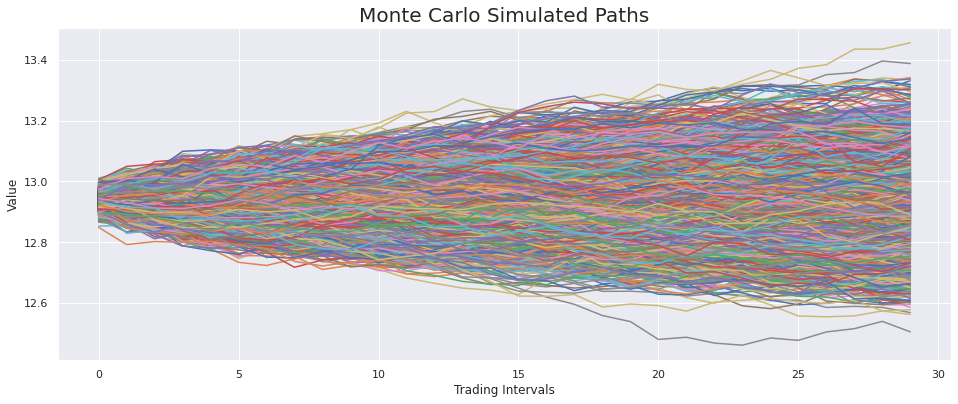

In [4]:
#Monte Carlo Simulation of asset/position
S = stockData['Close'][-1]
T = 30/252
sigma = np.std(stockDataReturns)
steps = 30
N = 10000
paths = geo_paths(S, T, sigma, steps, N)


plt.plot(paths)
plt.title('Monte Carlo Simulated Paths', size = 20)
plt.xlabel('Trading Intervals')
plt.ylabel('Value')
plt.show()


In [5]:
#Functions
def VaR(returns, alpha = 5):
    """Input: pandas series of returns
    Output: percentile on return disstribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError('Expected a panda series.')
        
def CVaR(returns, alpha = 5):
    """Input: pandas series of returns
    Output: Expected shortfall to a givene confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= VaR(returns, alpha = alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError('Expected a panda series.')
        
def geo_paths(S, T, sigma, steps, N, r=0, q=0):
    """
    Parameters:
    S: Value of asset/position
    T: Time in Years
    r: Interest-free rate
    q: Continuous dividend yield
    sigma: Yearly volatility of stock
    steps: Number of steps in a simulation
    N: Number of simulations
    
    Output: Simulated geometric Brownian motion paths of assets/positions according to the inputs.
    """
    dt = T / steps
    ST = S * np.exp(np.cumsum(((r - q - sigma**2 / 2) * dt +
                               sigma * np.sqrt(dt) *
                               np.random.normal(size=(steps, N))), axis=0))
    return ST

In [6]:
#Data Collection
end = datetime.datetime.today()
start = end-datetime.timedelta(days = 365)
stockData = yf.download('F', start, end)
stockDataReturns = stockData['Close'].pct_change()
stockDataReturns = stockDataReturns.dropna()

pathReturns = [pd.Series(path).pct_change().dropna() for path in paths]
mcVaR = -np.mean(pd.Series([VaR(path) for path in pathReturns]))
mcCVaR = -np.mean(pd.Series([CVaR(path) for path in pathReturns]))
print(f'Value at Risk Monte Carlo: {mcVaR}')
print(f'Condition at Risk Monte Carlo: {mcCVaR}')


historicalVaR = -VaR(stockDataReturns)
historicalCVaR = -CVaR(stockDataReturns)
print(f'Historical value at Risk: {historicalVaR}')
print(f'Historical Condition at Risk: {historicalCVaR}')


[*********************100%***********************]  1 of 1 completed
Value at Risk Monte Carlo: 0.013848487076459963
Condition at Risk Monte Carlo: 0.017328230230497052
Historical value at Risk: 0.04257066862355663
Historical Condition at Risk: 0.06240027675531127


## The Limitations of Monte Carlo for VaR and CVaR Estimation

Monte Carlo simulation is a powerful technique widely used in finance to estimate risk measures such as Value at Risk (VaR) and Conditional Value at Risk (CVaR). However, it's important to recognize that Monte Carlo simulations, while versatile, can sometimes produce inaccurate results for VaR and CVaR estimates. This is due to several inherent limitations of the method. Let's explore these limitations and discuss potential refinements to improve the accuracy of estimates.

### Key Limitations of Monte Carlo Simulation:

1. **Assumption of Geometric Brownian Motion:** Many Monte Carlo simulations assume that asset prices follow a geometric Brownian motion, which implies constant volatility and log-normal returns. In reality, asset prices can exhibit more complex behaviors, including jumps, fat tails, and time-varying volatility. Ignoring these complexities can lead to inaccurate risk estimates.

2. **Model Assumptions:** Monte Carlo simulations are based on specific models and assumptions about the underlying data. If the chosen model does not accurately capture the dynamics of the market, the generated paths may not reflect the true distribution of returns.

3. **Limited Historical Data:** Historical data used to calibrate the model might not be sufficient to capture extreme events or shifts in market conditions. This can lead to underestimating tail risks, which are critical for accurate VaR and CVaR estimates.

4. **Path Dependence:** The simulated paths are dependent on the sequence of random numbers generated. This can lead to unrealistic patterns in asset price movement and affect the accuracy of risk estimates.

### Refinements to Improve Accuracy:

To address these limitations and enhance the accuracy of Monte Carlo-based VaR and CVaR estimates, several refinements can be considered:

1. **Advanced Stochastic Models:** Instead of assuming simple geometric Brownian motion, explore more sophisticated stochastic models that incorporate features like jumps, volatility clustering, and mean reversion. These models can better capture the complexities of financial markets.

2. **Historical Volatility Dynamics:** Use historical data to estimate time-varying volatility and correlations, allowing the simulation to adapt to changing market conditions.

3. **Calibration to Market Data:** Calibrate the simulation to market prices of derivatives or options to ensure the model aligns with observed market behavior.

4. **Scenario Analysis:** Combine Monte Carlo with scenario analysis by simulating specific market scenarios (e.g., financial crises) and analyzing their impact on risk measures.

5. **Bootstrap Methods:** Utilize bootstrap resampling techniques to generate multiple scenarios from historical data, capturing a wider range of potential outcomes.

6. **High-Performance Computing:** Increase the number of simulations and paths to reduce the impact of randomness and improve convergence.

7. **Model Validation:** Regularly assess the accuracy of the chosen model by comparing simulated results to historical outcomes.

In conclusion, while Monte Carlo simulation is a valuable tool for risk estimation, it's important to recognize its limitations and refine the method to enhance accuracy. Incorporating more sophisticated models, historical dynamics, and thorough validation can lead to more reliable VaR and CVaR estimates, providing better insights into potential downside risks in financial portfolios.

Returns on stocks are often not normally distributed. We perform an Anderson-Darling test, with a p-value of .05, to determine if the historical returns of our stock are normally distributed.

In [7]:
# Run Anderson-Darling test
result = anderson(stockDataReturns)

# Extract test statistic and critical values
test_statistic = result.statistic
critical_values = result.critical_values

# Print results
print("Anderson-Darling Test Statistic:", test_statistic)
# Interpret the results
if test_statistic < critical_values[2]:
    print("The data appears to be normally distributed.")
else:
    print("The data significantly deviates from a normal distribution.")

Anderson-Darling Test Statistic: 2.077099981665583
The data significantly deviates from a normal distribution.


As an experiment, we create a probability density function from the returns, and perform a Monte-Carlo method to estimate VaR/CVaR using the historical return distribution.

In [8]:
#Data Collection
end = datetime.datetime.today()
start = end-datetime.timedelta(days = 365)
stockData = yf.download('MSFT', start, end)
stockDataReturns = stockData['Close'].pct_change()
stockDataReturns = stockDataReturns.dropna()

[*********************100%***********************]  1 of 1 completed


In [9]:
historicalVaR = -VaR(stockDataReturns)
historicalCVaR = -CVaR(stockDataReturns)
print(f'Historical value at Risk: {historicalVaR}')
print(f'Historical Condition at Risk: {historicalCVaR}')

Historical value at Risk: 0.026602944476966223
Historical Condition at Risk: 0.03952650879388919


In [10]:
paths = [np.random.choice(stockDataReturns.values, size=30) for i in range(10000)]
values = [[1] for i in range(10000)]
for i in range(10000):
    for j in range(30):
        values[i].append((1+paths[i][j])*(values[i][j]))

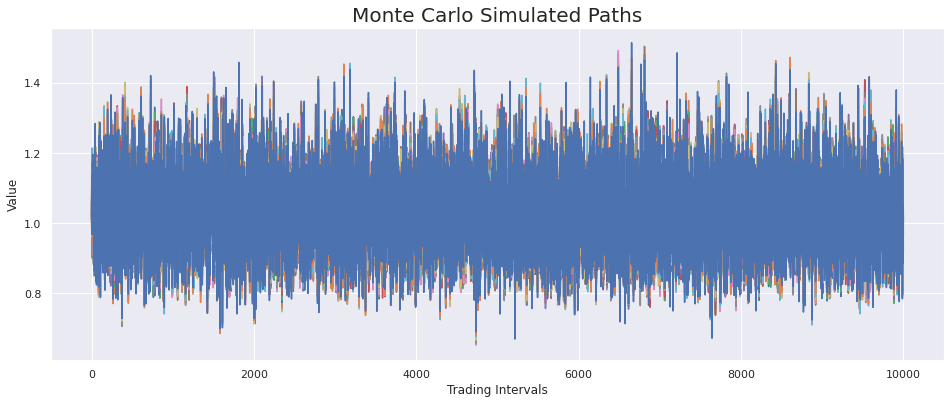

In [11]:
plt.plot(values)
plt.title('Monte Carlo Simulated Paths', size = 20)
plt.xlabel('Trading Intervals')
plt.ylabel('Value')
plt.show()

In [12]:
mcVaR = -np.mean(pd.Series([VaR(pd.Series(path)) for path in paths]))
mcCVaR = -np.mean(pd.Series([CVaR(pd.Series(path)) for path in paths]))
print(f'Value at Risk Monte Carlo: {mcVaR}')
print(f'Condition at Risk Monte Carlo: {mcCVaR}')

Value at Risk Monte Carlo: 0.025969729034198804
Condition at Risk Monte Carlo: 0.03443149823606879


As an interesting remark, the computations for VaR and CVaR using the naive method of randomly picking historical returns are closer to the historical VaR and CVaR. However, the simulated paths appear to be way off from what actual returns look like. 

This leads me to be cautious of using this method to value an asset or position.

We lastly experiment we finding VaR and CVaR using GARCH(1,1) to model the volatility.

In [13]:
# Specify the GARCH(1,1) model
model = arch_model(stockDataReturns*100, vol='Garch', p=1, q=1)

# Fit the model to the data
results = model.fit(disp = 'off')

In [14]:
forecasted_volatility = results.conditional_volatility[-1]
confidence_level = 0.95
z_score = np.percentile(np.random.normal(size=10000), confidence_level * 100)
one_day_VaR = z_score * forecasted_volatility/100

# Calculate the CVaR for returns below the one-day VaR
cvar = -stockDataReturns[stockDataReturns < -one_day_VaR/100].mean()

print(results.summary())
print(f'Forecasted Volatility: {forecasted_volatility}')
print("One-Day VaR:", one_day_VaR)
print("CVaR for Returns Below VaR:", cvar)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -525.289
Distribution:                  Normal   AIC:                           1058.58
Method:            Maximum Likelihood   BIC:                           1072.66
                                        No. Observations:                  250
Date:                Tue, Aug 08 2023   Df Residuals:                      249
Time:                        11:36:44   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1003      0.128      0.786      0.432 [ -0.150,  0.35

Our last comparison we make is that we from a GARCH(1,1) model on a training set, predict volatility on a testing set, and consequently predict VaR and CVaR on a testing set. We then compare these values to the historical values of VaR and CVaR on the testing set.

In [15]:
#Split Data into Training and Testing Sets
testing_set = stockDataReturns.iloc[-50:]
training_set = stockDataReturns.iloc[:-50]


# Perform GARCH Modeling on the Training Set
# Rescale the data (multiply by 100)
training_set_scaled = training_set * 100

# Fit the GARCH(1,1) model to the rescaled training set
garch_model = arch_model(training_set_scaled, vol='Garch', p=1, q=1)
results = garch_model.fit(disp='off')

# Calculate GARCH volatility for the testing set
garch_volatility_predict = results.conditional_volatility[-100:]/100

In [16]:
# Set the confidence level for VaR (and CVaR) (95%)
confidence_level = 0.95

# Compute VaR and CVaR from GARCH using the inverse of the cumulative standard normal distribution
var = 1.0 * garch_volatility_predict.quantile(1 - confidence_level)
cvar = 1.0 * garch_volatility_predict[garch_volatility_predict <= var].mean()

print(f'Value at Risk at the {confidence_level*100:.2f}% confidence level: {var:.8f}')
print(f'CVaR at {confidence_level*100:.2f}% confidence level: {cvar:.8f}')

Value at Risk at the 95.00% confidence level: 0.01963864
CVaR at 95.00% confidence level: 0.01955118


In [17]:
historicalVaR = -VaR(testing_set)
historicalCVaR = -CVaR(testing_set)
print(f'Historical value at Risk at 95% cofidence level: {historicalVaR}')
print(f'Historical Condition at Risk at 95% cofidence level: {historicalCVaR}')

Historical value at Risk at 95% cofidence level: 0.024860291660437822
Historical Condition at Risk at 95% cofidence level: 0.03159610417168168
